# Importing Libraries and Loading the file

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the file
file_path = 'Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Data Analysis and Preprocessing

In [3]:
# Clean the data by selecting relevant columns
cleaned_data = data[['Observation Date', 'Unemployment Rate']]

# Convert the 'Observation Date' column to datetime format using .loc to avoid the warning
cleaned_data.loc[:, 'Observation Date'] = pd.to_datetime(cleaned_data['Observation Date'])

# Set the 'Observation Date' column as the index
cleaned_data.set_index('Observation Date', inplace=True)

In [4]:
# Check for missing data
missing_data = cleaned_data.isnull().sum()

# Display the missing data information
missing_data.head()

Unemployment Rate    0
dtype: int64

In [5]:
# Perform basic analysis: Summary statistics and plot
summary_stats = cleaned_data.describe()

In [6]:
summary_stats

,Unemployment Rate
count,799.000000
mean,5.865957
std,1.685733
min,3.400000
25%,4.600000
50%,5.600000
75%,6.900000
max,14.800000


# Data Plotting

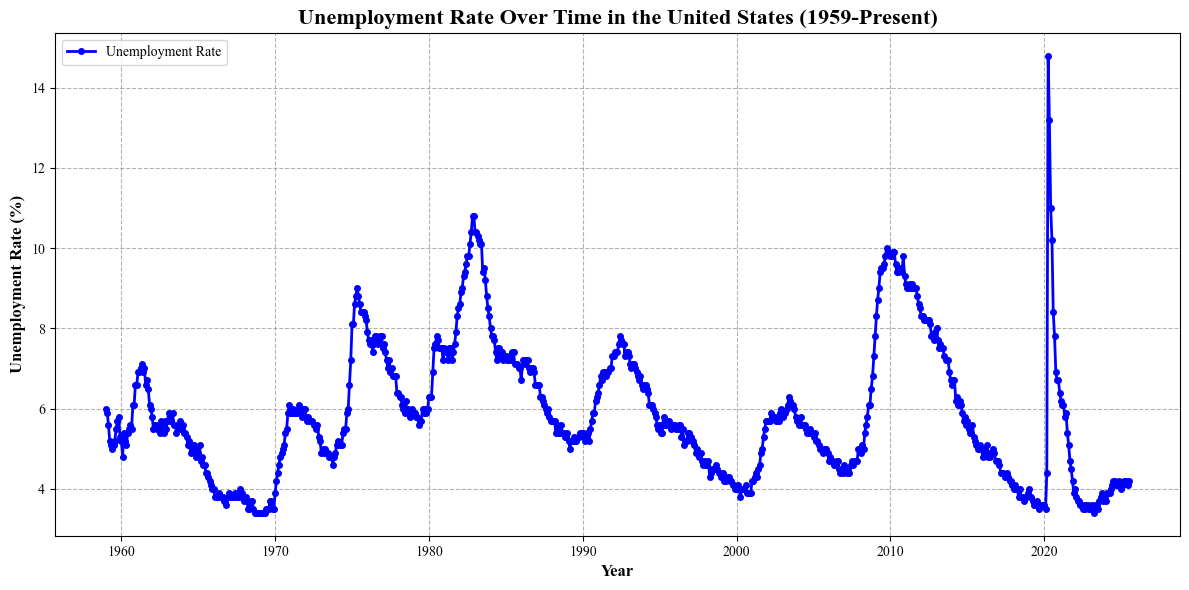

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Plot the unemployment rate over time with professional styling
plt.figure(figsize=(12, 6))

# Plot with a line and markers for better visibility
plt.plot(cleaned_data.index, cleaned_data['Unemployment Rate'], label='Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)

# Add title 
plt.title('Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold', family='Times New Roman')

# Add labels 
plt.xlabel('Year', fontsize=12, fontweight='bold', family='Times New Roman')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold', family='Times New Roman')

# Add grid 
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Customize tick marks and labels 
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')

# Adding a legend 
plt.legend(loc='upper left', fontsize=10, prop={'family': 'Times New Roman'})

# Make layout tight to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Stochastic Properties and Pre-testing

# ACF, PACF, and ADF Test

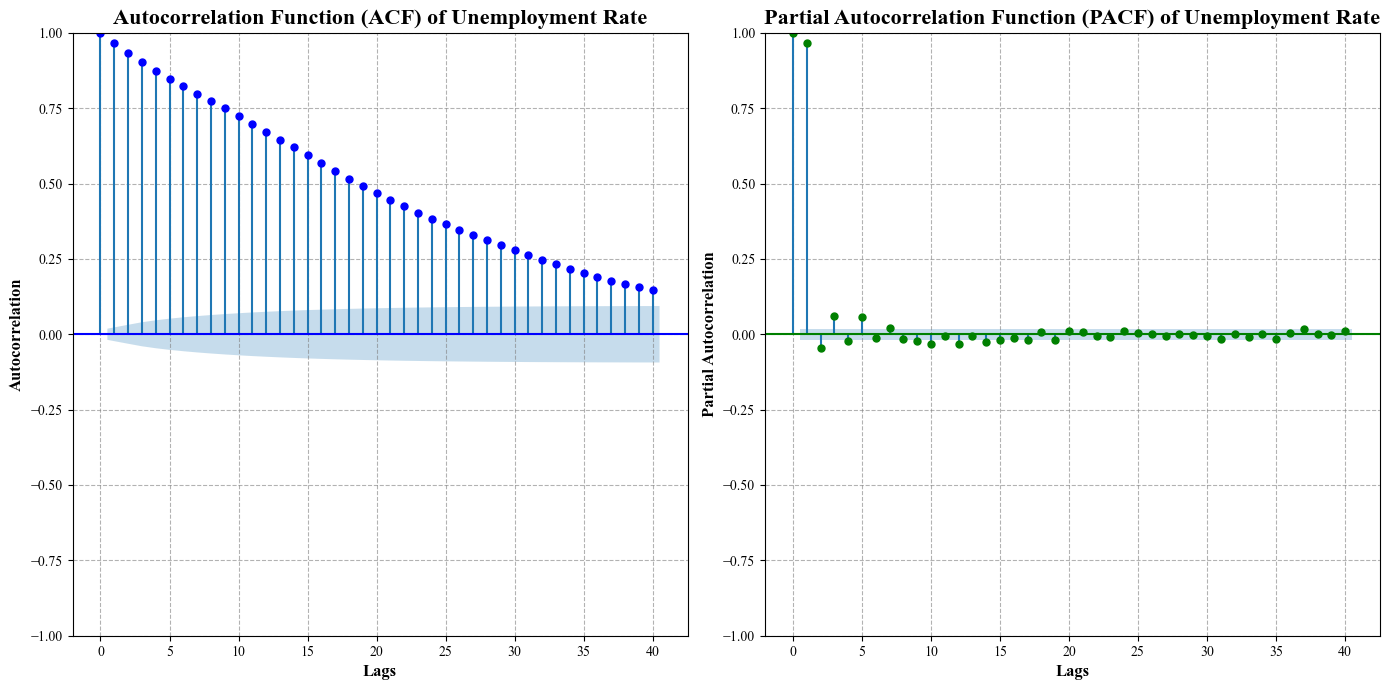

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Plot ACF and PACF 
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
df_cleaned = cleaned_data

# Perform the Augmented Dickey-Fuller test on the 'Unemployment Rate' series
adf_result = adfuller(df_cleaned['Unemployment Rate'])

# Extract the ADF results
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
adf_critical_values = adf_result[4]

# Display the ADF result 
print("Augmented Dickey-Fuller Test Results")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_p_value:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value < 0.05:
    print("Conclusion: The series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).")


Augmented Dickey-Fuller Test Results
--------------------------------------------------
ADF Statistic: -3.4190
P-value: 0.0103

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The series is likely stationary (reject the null hypothesis).


# Differencing to make the Data Stationary

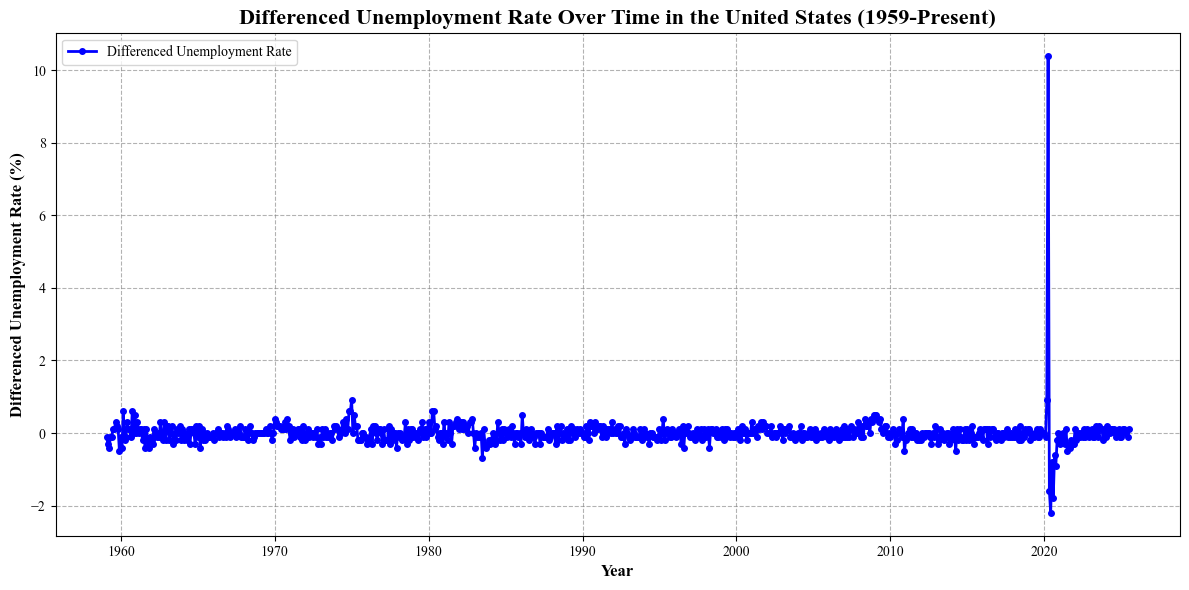

Augmented Dickey-Fuller Test Results for Differenced Data
--------------------------------------------------
ADF Statistic: -15.5277
P-value: 0.0000

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The differenced series is likely stationary (reject the null hypothesis).


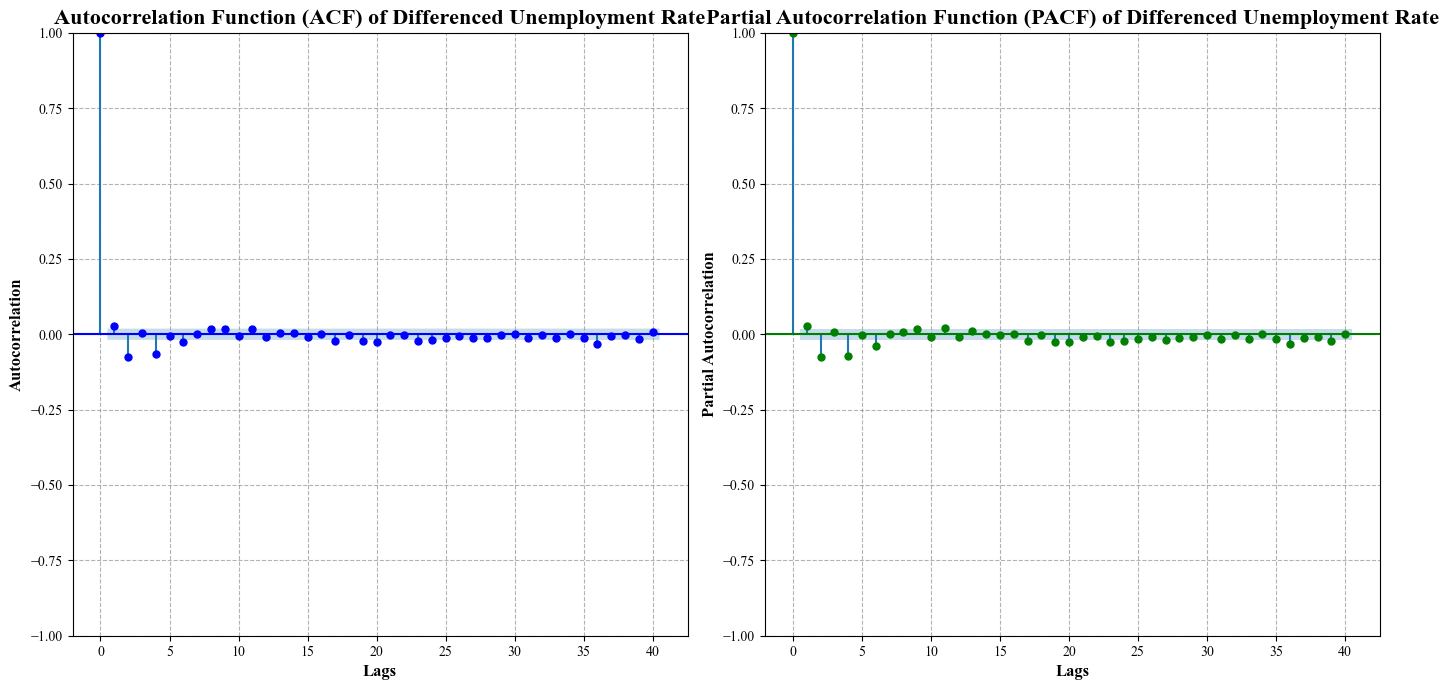

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

# Set font to Times New Roman for all plots
rcParams['font.family'] = 'Times New Roman'

# Apply differencing to make the data stationary
df_cleaned['Unemployment Rate Diff'] = df_cleaned['Unemployment Rate'].diff()

# Drop the first row since it will be NaN due to the differencing
df_cleaned.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))

plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label='Differenced Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)
plt.title('Differenced Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Differenced Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Re-run the Augmented Dickey-Fuller test to check if the differenced series is stationary
adf_result_diff = adfuller(df_cleaned['Unemployment Rate Diff'])

# Extract the ADF results
adf_statistic_diff = adf_result_diff[0]
adf_p_value_diff = adf_result_diff[1]
adf_critical_values_diff = adf_result_diff[4]

# Display the ADF result for differenced data
print("Augmented Dickey-Fuller Test Results for Differenced Data")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic_diff:.4f}")
print(f"P-value: {adf_p_value_diff:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values_diff.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value_diff < 0.05:
    print("Conclusion: The differenced series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The differenced series is likely non-stationary (fail to reject the null hypothesis).")

# Plot ACF and PACF for differenced Unemployment Rate
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()


# Find Optimal AR Lag Using AIC and BIC

AIC and BIC Values for Different Lags
--------------------------------------------------
Lag 1: AIC = 915.0290, BIC = 929.0716
Lag 2: AIC = 911.7870, BIC = 930.5054
Lag 3: AIC = 912.7465, BIC = 936.1383
Lag 4: AIC = 910.2292, BIC = 938.2917
Lag 5: AIC = 911.9947, BIC = 944.7254
Lag 6: AIC = 912.7131, BIC = 950.1095
Lag 7: AIC = 914.5608, BIC = 956.6205
Lag 8: AIC = 915.9126, BIC = 962.6329
Lag 9: AIC = 917.3386, BIC = 968.7170
Lag 10: AIC = 919.0581, BIC = 975.0920
Lag 11: AIC = 919.3587, BIC = 980.0457
Lag 12: AIC = 921.1269, BIC = 986.4643
Lag 13: AIC = 921.9603, BIC = 991.9456
Lag 14: AIC = 921.6016, BIC = 996.2322
Lag 15: AIC = 923.0053, BIC = 1002.2786
Lag 16: AIC = 924.8610, BIC = 1008.7744
Lag 17: AIC = 926.0114, BIC = 1014.5623
Lag 18: AIC = 927.7845, BIC = 1020.9703
Lag 19: AIC = 929.0473, BIC = 1026.8655
Lag 20: AIC = 930.3470, BIC = 1032.7950
--------------------------------------------------
Optimal lag based on AIC: 4
Optimal lag based on BIC: 1


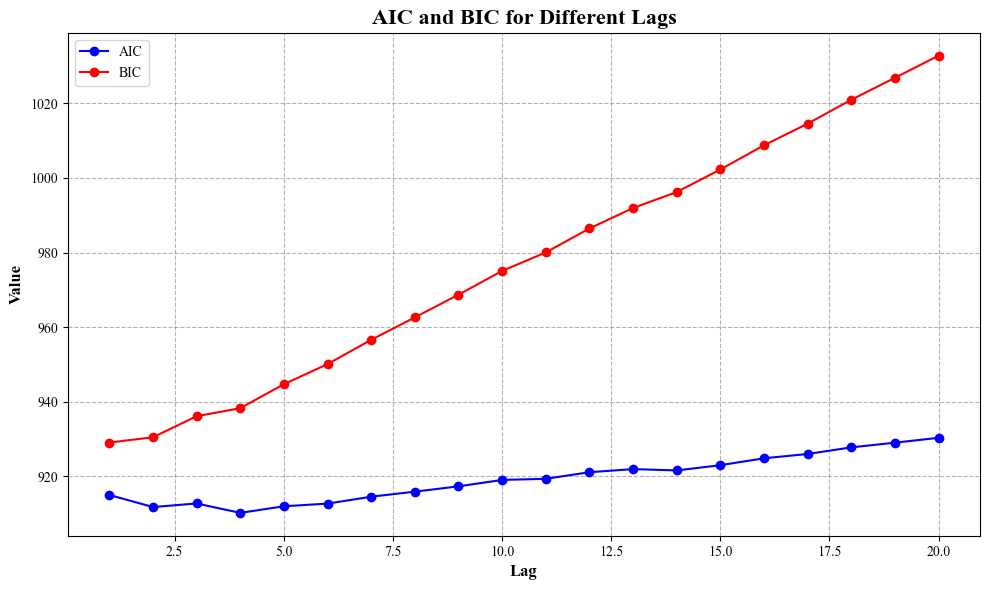

In [11]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Set the frequency to monthly (MS - Month Start) if the data is monthly
df_cleaned = df_cleaned.asfreq('MS')

# Max lag to check
max_lag = 20  

# Store the AIC and BIC values for each lag
aic_values = []
bic_values = []
lags = list(range(1, max_lag + 1))

# Loop over different lags and fit the AR model
for lag in lags:
    model = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=lag)  # Use differenced series
    ar_model_fitted = model.fit()
    
    # Store the AIC and BIC values for each lag
    aic_values.append(ar_model_fitted.aic)
    bic_values.append(ar_model_fitted.bic)

# Find the lag with the lowest AIC and BIC
optimal_aic_lag = lags[np.argmin(aic_values)]
optimal_bic_lag = lags[np.argmin(bic_values)]

# Print AIC and BIC values for each lag
print("AIC and BIC Values for Different Lags")
print("-" * 50)
for lag, aic, bic in zip(lags, aic_values, bic_values):
    print(f"Lag {lag}: AIC = {aic:.4f}, BIC = {bic:.4f}")

# Print the optimal lags based on AIC and BIC
print("-" * 50)
print(f"Optimal lag based on AIC: {optimal_aic_lag}")
print(f"Optimal lag based on BIC: {optimal_bic_lag}")

# Plot the AIC and BIC values for each lag
plt.figure(figsize=(10, 6))
plt.plot(lags, aic_values, label='AIC', color='b', marker='o')
plt.plot(lags, bic_values, label='BIC', color='r', marker='o')
plt.xlabel('Lag', fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=12, fontweight='bold')
plt.title('AIC and BIC for Different Lags', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.6)
plt.tight_layout()
plt.show()

# Auto Regressive Model


AR-4 Model Summary
                              AutoReg Model Results                               
Dep. Variable:     Unemployment Rate Diff   No. Observations:                  638
Model:                         AutoReg(4)   Log Likelihood                 223.988
Method:                   Conditional MLE   S.D. of innovations              0.170
Date:                    Wed, 31 Dec 2025   AIC                           -435.976
Time:                            09:04:07   BIC                           -409.264
Sample:                        06-01-1959   HQIC                          -425.604
                             - 03-01-2012                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0026      0.007      0.390      0.697      -0.011       0.016
Unemployment Rate Diff.L1     0.01

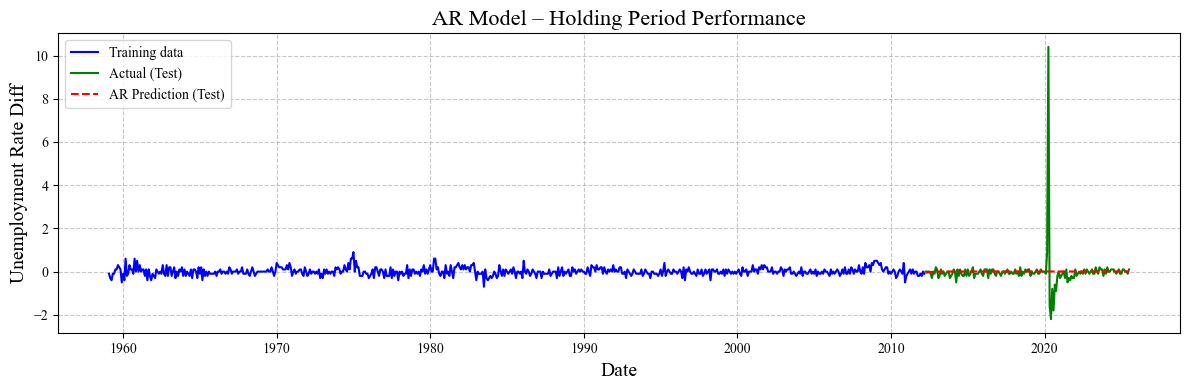

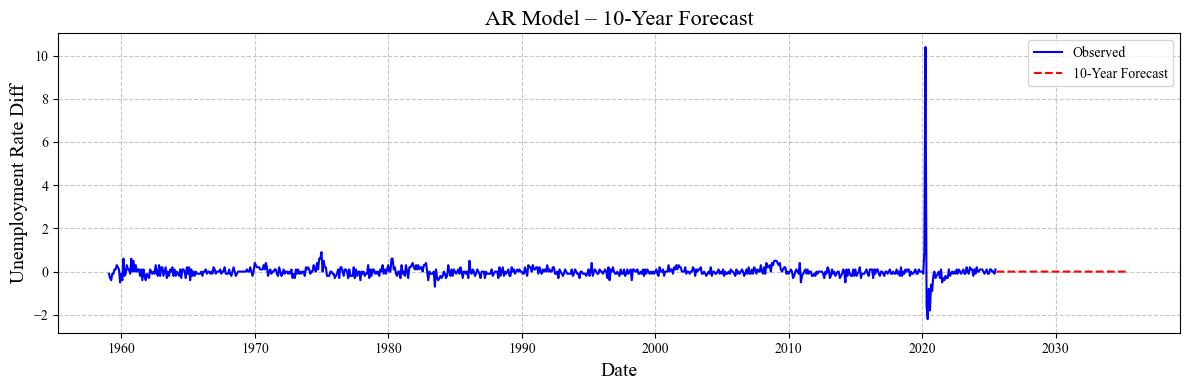

MAE (Mean Absolute Error): 0.2292
MSE (Mean Squared Error): 0.7798
RMSE (Root Mean Squared Error): 0.8831
Ljung-Box Test for Residuals
      lb_stat  lb_pvalue
12  19.289776   0.081771
  Metric     Value
0    MAE  0.229228
1    MSE  0.779839
2   RMSE  0.883085


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Use the optimal lag (e.g., optimal_aic_lag or optimal_bic_lag)
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Assuming 'df_cleaned' contains the original dataset with 'Unemployment Rate' and 'Observation Date'
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure the frequency is set to monthly

# Split the data into training and testing sets (assuming df_cleaned is your DataFrame)
train = df_cleaned['Unemployment Rate Diff'][:int(0.8 * len(df_cleaned))]
test = df_cleaned['Unemployment Rate Diff'][int(0.8 * len(df_cleaned)):]

# Fit the AR model with the optimal lag
ar_model = AutoReg(train, lags=optimal_lag).fit()

# Print AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model.summary())

# One-step-ahead predictions for the test period
test_pred = ar_model.predict(
    start=test.index[0],
    end=test.index[-1],
    dynamic=False
)

# Plotting the results with professional settings
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Refit the model on the full dataset (for forecasting)
ar_full = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=optimal_lag).fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120  # 10 years * 12 months
forecast_120 = ar_full.predict(
    start=len(df_cleaned),
    end=len(df_cleaned) + forecast_steps - 1,
    dynamic=False
)

# Create a new time index for the forecasted period (next 10 years)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast_120, index=forecast_index)

# Plot the original data and the forecasted values with professional settings
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_series.index, forecast_series, label="10-Year Forecast", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("AR Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 7: Model Evaluation – Calculate MAE, MSE, RMSE, and MAPE
y_true = test.values
y_pred = test_pred.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Root Mean Squared Error (RMSE)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse_value:.4f}')


# Model residuals (actual − fitted)
resid = ar_model.resid

# Step 8: Perform the Ljung-Box test for autocorrelation in residuals
lb = acorr_ljungbox(resid, lags=[12], return_df=True)
print("Ljung-Box Test for Residuals")
print(lb)

# Step 9: Create a table with MAE, MSE, RMSE, and MAPE metrics
accuracy_table = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae, mse, rmse_value]
})

# Display the accuracy table
print(accuracy_table)


# ARIMA

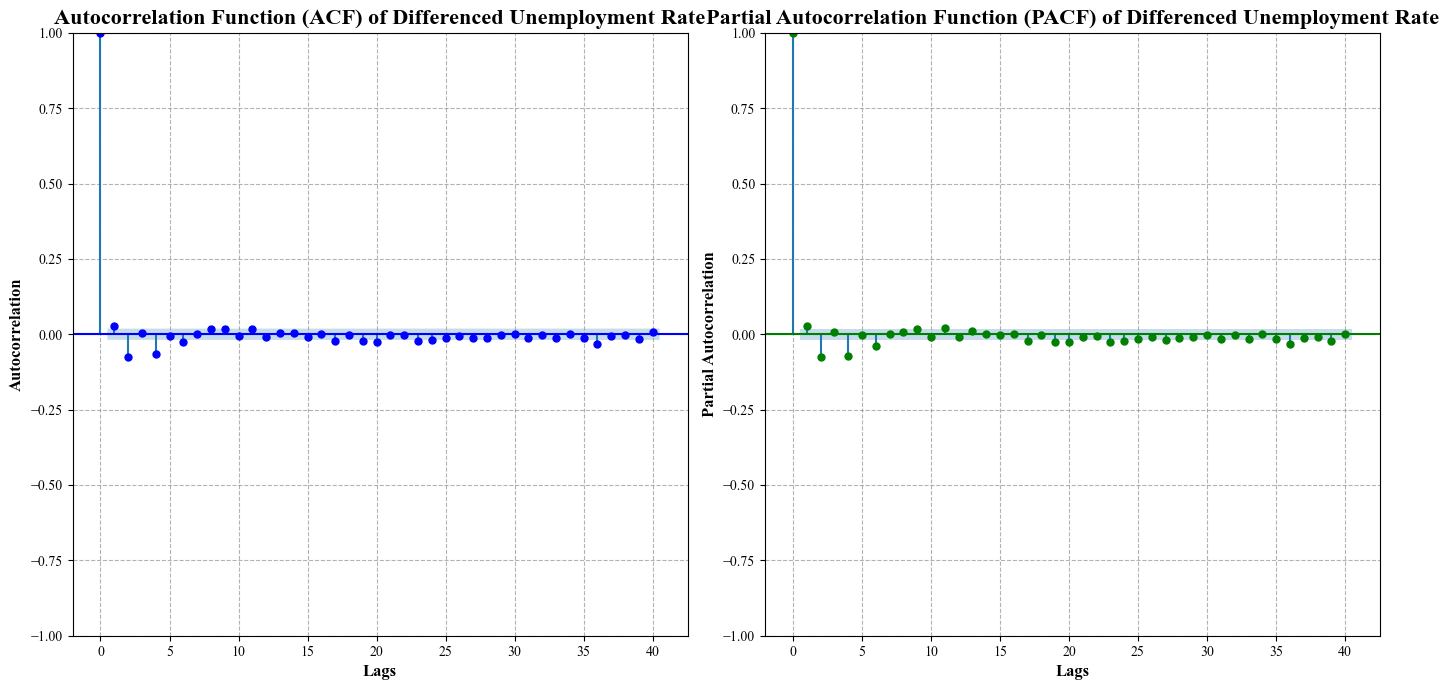

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=911.877, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.243, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=913.130, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=909.605, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=910.607, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=910.515, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=909.785, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=910.620, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=911.584, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.064 seconds
Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  798
Model:               SARIMAX(1, 0, 1)   Log Likelihood    

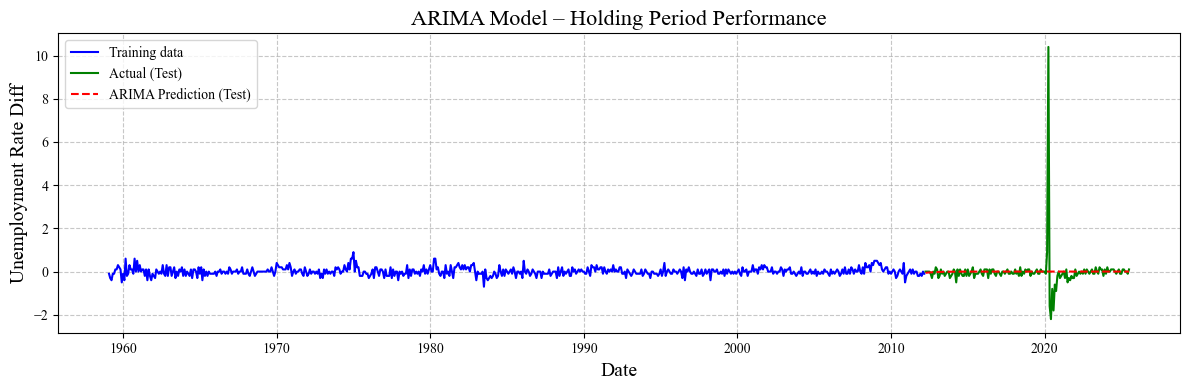

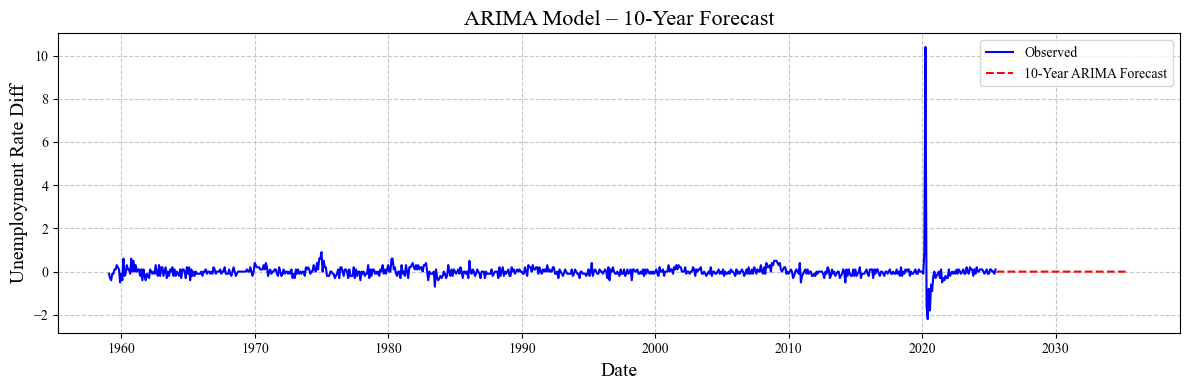

MAE (Mean Absolute Error) for ARIMA: 0.2275
MSE (Mean Squared Error) for ARIMA: 0.7794
RMSE (Root Mean Squared Error) for ARIMA: 0.8829
Ljung-Box Test for ARIMA Residuals
      lb_stat  lb_pvalue
12  48.626001   0.000002
  Metric     Value
0    MAE  0.227489
1    MSE  0.779431
2   RMSE  0.882854


In [13]:
# Import necessary libraries for ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Identify optimal ARIMA parameters using ACF and PACF
plt.figure(figsize=(14, 7))

# Plot ACF for Unemployment Rate
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF for Unemployment Rate
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

# Step 2: Fit the ARIMA model using the 'auto_arima' function to determine the optimal parameters (p, d, q)
model = auto_arima(df_cleaned['Unemployment Rate Diff'], seasonal=False, stepwise=True, trace=True)

# Print the optimal ARIMA model
print(f"Best ARIMA model: {model.summary()}")

# Step 3: Fit the ARIMA model with the optimal parameters
p, d, q = model.order  # Get optimal p, d, q from auto_arima
arima_model = ARIMA(df_cleaned['Unemployment Rate Diff'], order=(p, d, q)).fit()

# Print the ARIMA model summary
print(f"\nARIMA-{p},{d},{q} Model Summary")
print(arima_model.summary())

# Step 4: Make predictions using the ARIMA model
# Split the data into training and testing sets (80% training, 20% testing)
train = df_cleaned['Unemployment Rate Diff'][:int(0.8 * len(df_cleaned))]
test = df_cleaned['Unemployment Rate Diff'][int(0.8 * len(df_cleaned)):]

# Fit the ARIMA model on the training set
arima_model = ARIMA(train, order=(p, d, q)).fit()

# Make predictions on the test set
test_pred_arima = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Plot the results with professional settings
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_arima, label="ARIMA Prediction (Test)", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("ARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 5: Refit the ARIMA model on the full dataset (for forecasting)
arima_full_model = ARIMA(df_cleaned['Unemployment Rate Diff'], order=(p, d, q)).fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120  # 10 years * 12 months
forecast_arima_120 = arima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1, dynamic=False)

# Create a new time index for the forecasted period (next 10 years)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_arima_series = pd.Series(forecast_arima_120, index=forecast_index)

# Plot the original data and the forecasted values with professional settings
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_arima_series.index, forecast_arima_series, label="10-Year ARIMA Forecast", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("ARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 6: Model Evaluation – Calculate MAE, MSE, RMSE for ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test.values
y_pred_arima = test_pred_arima.values

# Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(y_true, y_pred_arima)
print(f'MAE (Mean Absolute Error) for ARIMA: {mae_arima:.4f}')

# Mean Squared Error (MSE)
mse_arima = mean_squared_error(y_true, y_pred_arima)
print(f'MSE (Mean Squared Error) for ARIMA: {mse_arima:.4f}')

# Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mse_arima)
print(f'RMSE (Root Mean Squared Error) for ARIMA: {rmse_arima:.4f}')

# Step 7: Ljung-Box test for autocorrelation in ARIMA residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

resid_arima = arima_model.resid

# Perform Ljung-Box test for residuals
lb_arima = acorr_ljungbox(resid_arima, lags=[12], return_df=True)
print("Ljung-Box Test for ARIMA Residuals")
print(lb_arima)

# Step 8: Create a table with MAE, MSE, RMSE for ARIMA
accuracy_table_arima = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae_arima, mse_arima, rmse_arima]
})

# Display the accuracy table
print(accuracy_table_arima)


# SARIMA

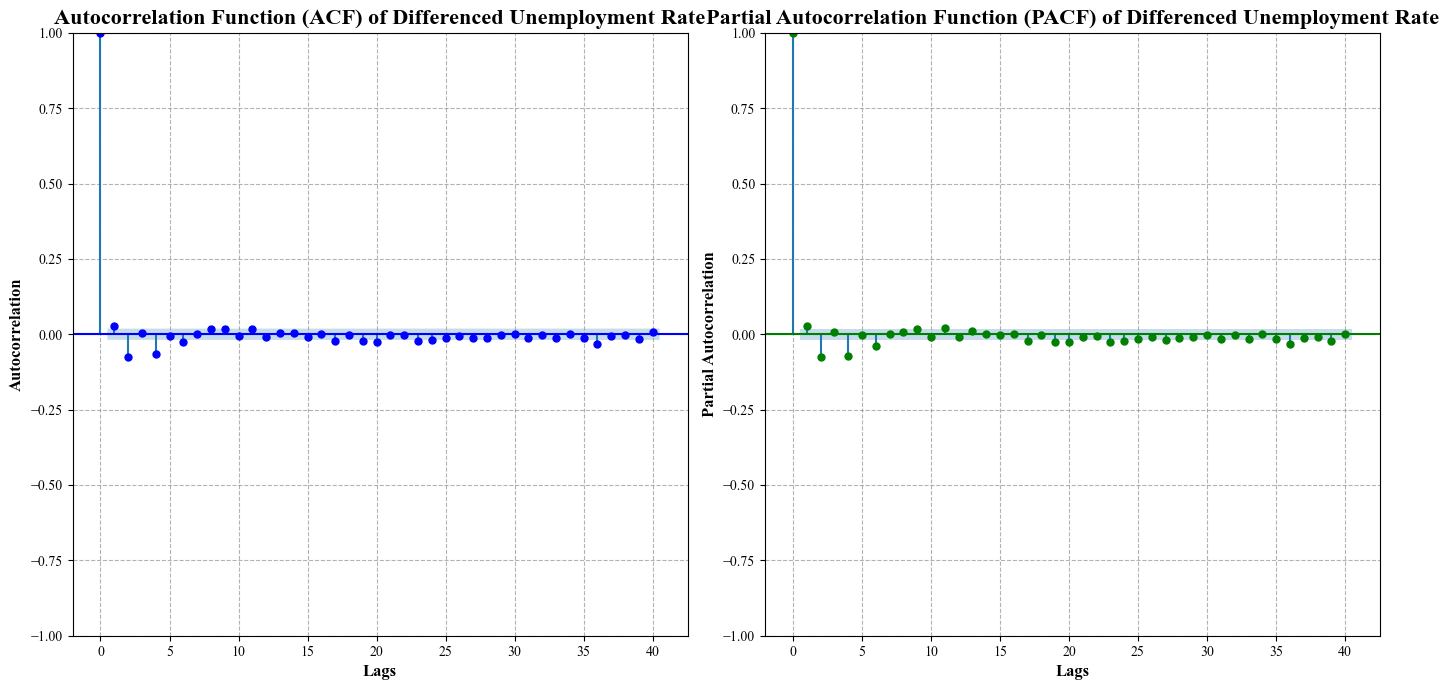


SARIMA Model Summary
                                     SARIMAX Results                                      
Dep. Variable:             Unemployment Rate Diff   No. Observations:                  798
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -480.239
Date:                            Wed, 31 Dec 2025   AIC                            970.478
Time:                                    09:04:11   BIC                            993.806
Sample:                                02-01-1959   HQIC                           979.448
                                     - 07-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0302      0.011      2.809      0.005       0.009       0.051
ma.L1        

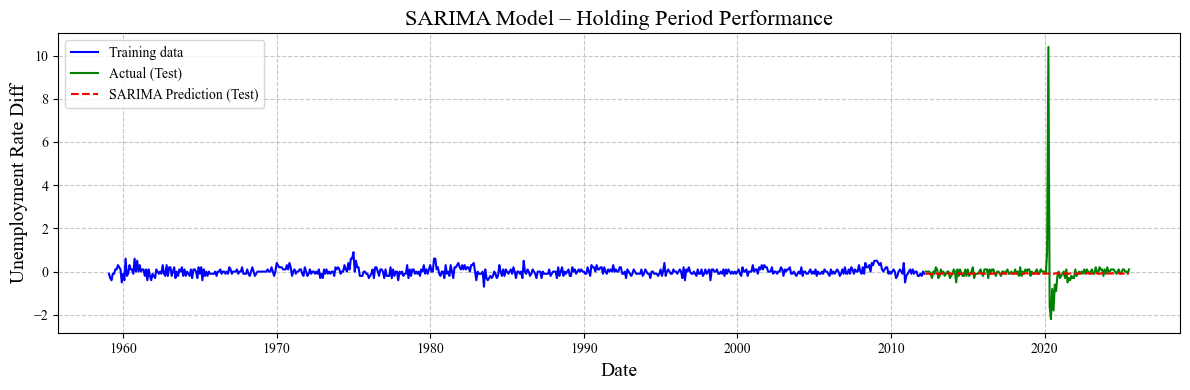

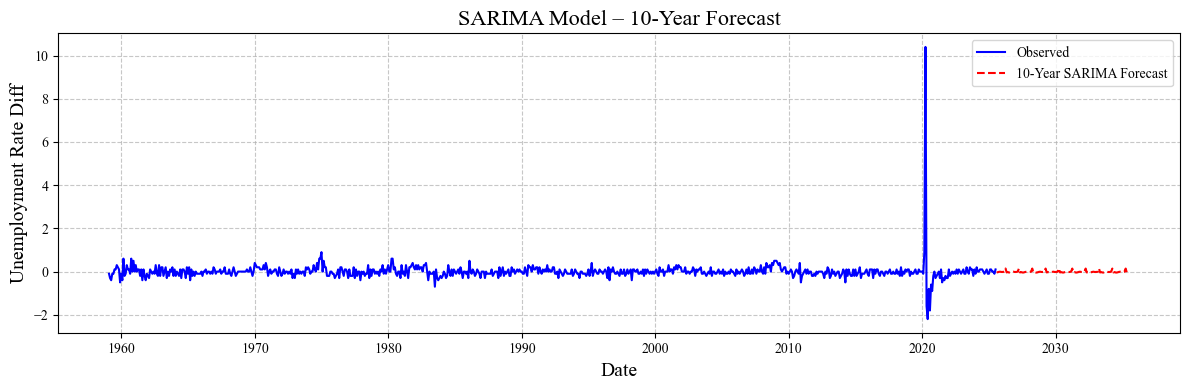

MAE (Mean Absolute Error) for SARIMA: 0.2282
MSE (Mean Squared Error) for SARIMA: 0.7837
RMSE (Root Mean Squared Error) for SARIMA: 0.8853
Ljung-Box Test for SARIMA Residuals
      lb_stat  lb_pvalue
12  16.595423    0.16546
  Metric     Value
0    MAE  0.228177
1    MSE  0.783741
2   RMSE  0.885292


In [14]:
# Import necessary libraries for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Identify seasonal patterns (ACF and PACF plots)
plt.figure(figsize=(14, 7))

# Plot ACF for Differenced Unemployment Rate
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF for Differenced Unemployment Rate
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

# Step 2: Fit the SARIMA model using SARIMAX
# Define seasonal periods (monthly data so S=12 for yearly seasonality)
seasonal_order = (1, 1, 1, 12)  # Example: (p, d, q, s) where s = 12 for monthly data

# Fit the SARIMA model
sarima_model = SARIMAX(df_cleaned['Unemployment Rate Diff'], order=(1, 1, 1), seasonal_order=seasonal_order).fit()

# Print the SARIMA model summary
print(f"\nSARIMA Model Summary")
print(sarima_model.summary())

# Step 3: Make predictions using the SARIMA model
# Split the data into training and testing sets (80% training, 20% testing)
train = df_cleaned['Unemployment Rate Diff'][:int(0.8 * len(df_cleaned))]
test = df_cleaned['Unemployment Rate Diff'][int(0.8 * len(df_cleaned)):]

# Fit the SARIMA model on the training set
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order).fit()

# Make predictions on the test set
test_pred_sarima = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Plot the results with professional settings
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_sarima, label="SARIMA Prediction (Test)", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("SARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 4: Refit the SARIMA model on the full dataset (for forecasting)
sarima_full_model = SARIMAX(df_cleaned['Unemployment Rate Diff'], order=(1, 1, 1), seasonal_order=seasonal_order).fit()

# Forecast for the next 10 years (120 months)
forecast_steps = 120  # 10 years * 12 months
forecast_sarima_120 = sarima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1, dynamic=False)

# Create a new time index for the forecasted period (next 10 years)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_sarima_series = pd.Series(forecast_sarima_120, index=forecast_index)

# Plot the original data and the forecasted values with professional settings
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="10-Year SARIMA Forecast", linestyle="--", color='r')

# Add grid, labels, and title
plt.title("SARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.legend()
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Step 5: Model Evaluation – Calculate MAE, MSE, RMSE for SARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test.values
y_pred_sarima = test_pred_sarima.values

# Mean Absolute Error (MAE)
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)
print(f'MAE (Mean Absolute Error) for SARIMA: {mae_sarima:.4f}')

# Mean Squared Error (MSE)
mse_sarima = mean_squared_error(y_true, y_pred_sarima)
print(f'MSE (Mean Squared Error) for SARIMA: {mse_sarima:.4f}')

# Root Mean Squared Error (RMSE)
rmse_sarima = np.sqrt(mse_sarima)
print(f'RMSE (Root Mean Squared Error) for SARIMA: {rmse_sarima:.4f}')

# Step 6: Ljung-Box test for autocorrelation in SARIMA residuals
from statsmodels.stats.diagnostic import acorr_ljungbox

resid_sarima = sarima_model.resid

# Perform Ljung-Box test for residuals
lb_sarima = acorr_ljungbox(resid_sarima, lags=[12], return_df=True)
print("Ljung-Box Test for SARIMA Residuals")
print(lb_sarima)

# Step 7: Create a table with MAE, MSE, RMSE for SARIMA
accuracy_table_sarima = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [mae_sarima, mse_sarima, rmse_sarima]
})

# Display the accuracy table
print(accuracy_table_sarima)


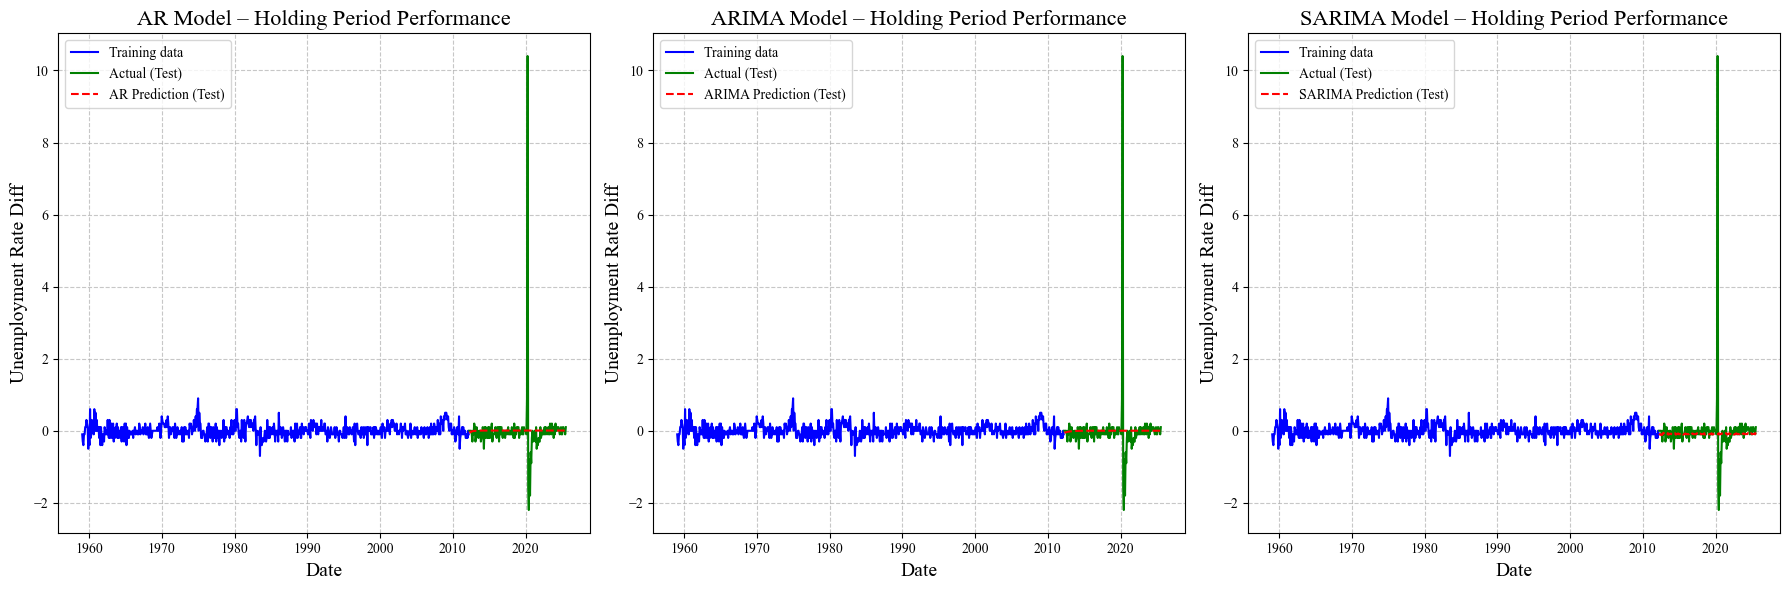

In [15]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Step 1: Plot the AR, ARIMA, and SARIMA results in a single figure

# Create a subplot grid with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the AR model results
axs[0].plot(train.index, train, label="Training data", color='b')
axs[0].plot(test.index, test, label="Actual (Test)", color='g')
axs[0].plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')
axs[0].set_title("AR Model – Holding Period Performance", fontsize=16)
axs[0].set_xlabel('Date', fontsize=14)
axs[0].set_ylabel('Unemployment Rate Diff', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()

# Plot the ARIMA model results
axs[1].plot(train.index, train, label="Training data", color='b')
axs[1].plot(test.index, test, label="Actual (Test)", color='g')
axs[1].plot(test.index, test_pred_arima, label="ARIMA Prediction (Test)", linestyle="--", color='r')
axs[1].set_title("ARIMA Model – Holding Period Performance", fontsize=16)
axs[1].set_xlabel('Date', fontsize=14)
axs[1].set_ylabel('Unemployment Rate Diff', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()

# Plot the SARIMA model results
axs[2].plot(train.index, train, label="Training data", color='b')
axs[2].plot(test.index, test, label="Actual (Test)", color='g')
axs[2].plot(test.index, test_pred_sarima, label="SARIMA Prediction (Test)", linestyle="--", color='r')
axs[2].set_title("SARIMA Model – Holding Period Performance", fontsize=16)
axs[2].set_xlabel('Date', fontsize=14)
axs[2].set_ylabel('Unemployment Rate Diff', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'forecast_ar_120' is not defined

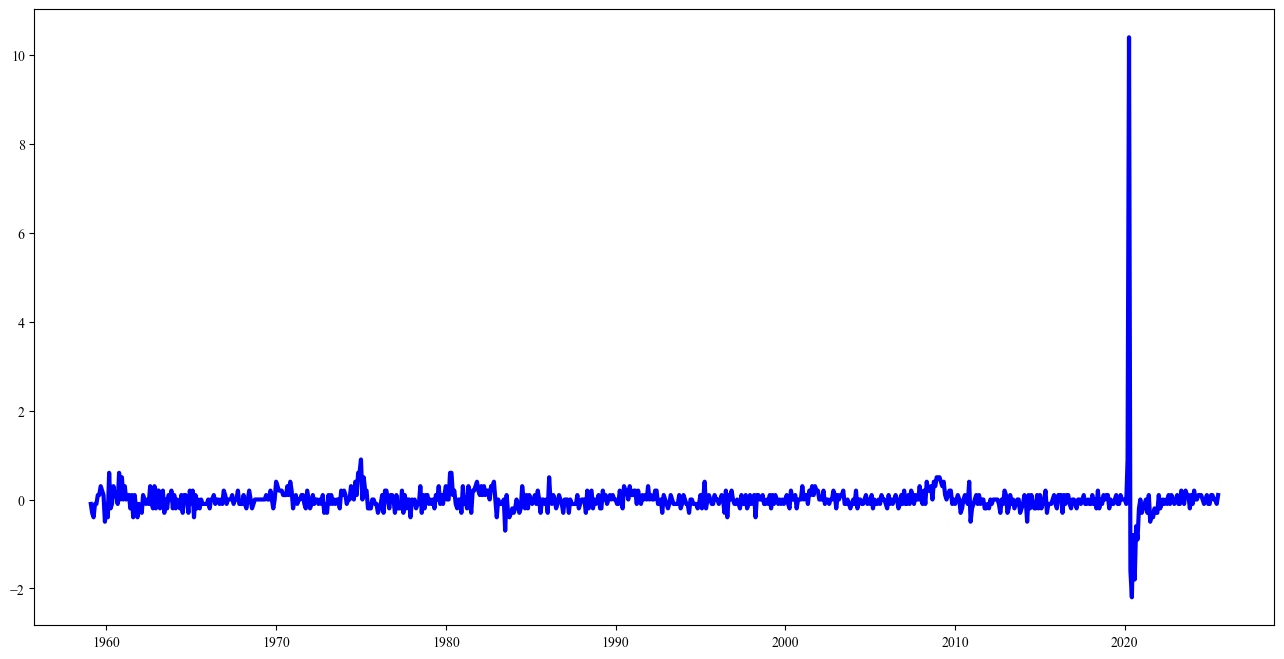

In [16]:
# Create a larger figure for better readability
plt.figure(figsize=(16, 8))

# Plot the observed data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b', linewidth=3)

# Plot the forecasted data for AR model (scaled up)
plt.plot(forecast_index, forecast_ar_120, label="AR Forecast (10 Years)", linestyle="--", color='r', linewidth=3)

# Plot the forecasted data for ARIMA model (scaled up)
plt.plot(forecast_index, forecast_arima_series, label="ARIMA Forecast (10 Years)", linestyle="--", color='g', linewidth=3)

# Plot the forecasted data for SARIMA model (scaled up)
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="SARIMA Forecast (10 Years)", linestyle="--", color='orange', linewidth=3)

# Add title, labels, and grid with increased font sizes for better readability
plt.title("10-Year Forecast Comparison: AR vs ARIMA vs SARIMA", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate Diff', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Adjust layout to prevent overlap and ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create a larger figure for better readability
plt.figure(figsize=(16, 8))

# Plot the forecasted data for AR model (10-Year Forecast)
plt.plot(forecast_index, forecast_ar_120, label="AR Forecast (10 Years)", linestyle="--", color='r', linewidth=3)

# Plot the forecasted data for ARIMA model (10-Year Forecast)
plt.plot(forecast_index, forecast_arima_series, label="ARIMA Forecast (10 Years)", linestyle="--", color='g', linewidth=3)

# Plot the forecasted data for SARIMA model (10-Year Forecast)
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="SARIMA Forecast (10 Years)", linestyle="--", color='orange', linewidth=3)

# Add title, labels, and grid with increased font sizes for better readability
plt.title("10-Year Forecast Comparison: AR vs ARIMA vs SARIMA", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate Diff', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Adjust layout to prevent overlap and ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Let's define the starting point for 2020
start_date_2020 = pd.to_datetime("2020-01-01")

# Filter the observed data from 2020 onward
observed_from_2020 = df_cleaned[df_cleaned.index >= start_date_2020]

# Holding forecast period (next 5 years from 2020)
holding_forecast_period = 5 * 12  # 5 years in months
forecast_period = 10 * 12  # 10 years in months

# Get the observed data for the last 5 years (holding forecast)
observed_last_5_years = df_cleaned['Unemployment Rate'].iloc[-holding_forecast_period:]

# Convert the differenced forecasted values back to real values by adding the last known actual value
last_observed_value = df_cleaned['Unemployment Rate'].iloc[-1]  # last actual value in the original scale

# Reverse the differencing for AR forecast (10-year)
forecast_ar_real = forecast_ar_120.cumsum() + last_observed_value

# Reverse the differencing for ARIMA forecast (10-year)
forecast_arima_real = forecast_arima_series.cumsum() + last_observed_value

# Reverse the differencing for SARIMA forecast (10-year)
forecast_sarima_real = forecast_sarima_series.cumsum() + last_observed_value

# Create a larger figure for better readability
plt.figure(figsize=(16, 8))

# Plot the observed data from 2020 onward (holding forecast)
plt.plot(observed_from_2020.index, observed_from_2020['Unemployment Rate'], label="Observed (From 2020)", color='b', linewidth=3)

# Plot the real forecasted data for AR model (5-Year Holding + 10-Year Forecast)
plt.plot(forecast_index, forecast_ar_real, label="AR Forecast (10 Years)", linestyle="--", color='r', linewidth=3)

# Plot the real forecasted data for ARIMA model (5-Year Holding + 10-Year Forecast)
plt.plot(forecast_index, forecast_arima_real, label="ARIMA Forecast (10 Years)", linestyle="--", color='g', linewidth=3)

# Plot the real forecasted data for SARIMA model (5-Year Holding + 10-Year Forecast)
plt.plot(forecast_sarima_real.index, forecast_sarima_real, label="SARIMA Forecast (10 Years)", linestyle="--", color='orange', linewidth=3)

# Add title, labels, and grid with increased font sizes for better readability
plt.title("Comparison: Observed vs AR, ARIMA, SARIMA Forecasts (From 2020, 5-Year Holding vs 10-Year Forecast)", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend with increased font size
plt.legend(fontsize=14)

# Adjust layout to prevent overlap and ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()



AR-4 Model Summary
                              AutoReg Model Results                               
Dep. Variable:     Unemployment Rate Diff   No. Observations:                  638
Model:                         AutoReg(4)   Log Likelihood                 223.988
Method:                   Conditional MLE   S.D. of innovations              0.170
Date:                    Wed, 31 Dec 2025   AIC                           -435.976
Time:                            09:08:38   BIC                           -409.264
Sample:                        06-01-1959   HQIC                          -425.604
                             - 03-01-2012                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0026      0.007      0.390      0.697      -0.011       0.016
Unemployment Rate Diff.L1     0.01

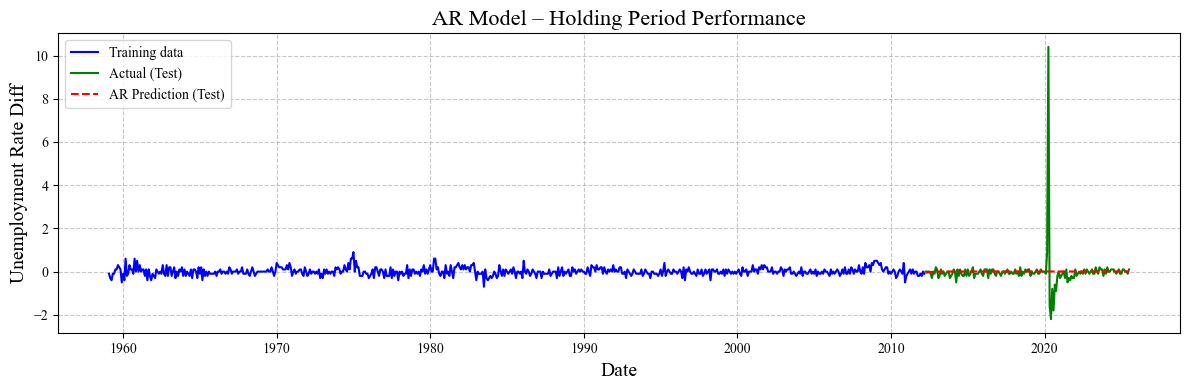

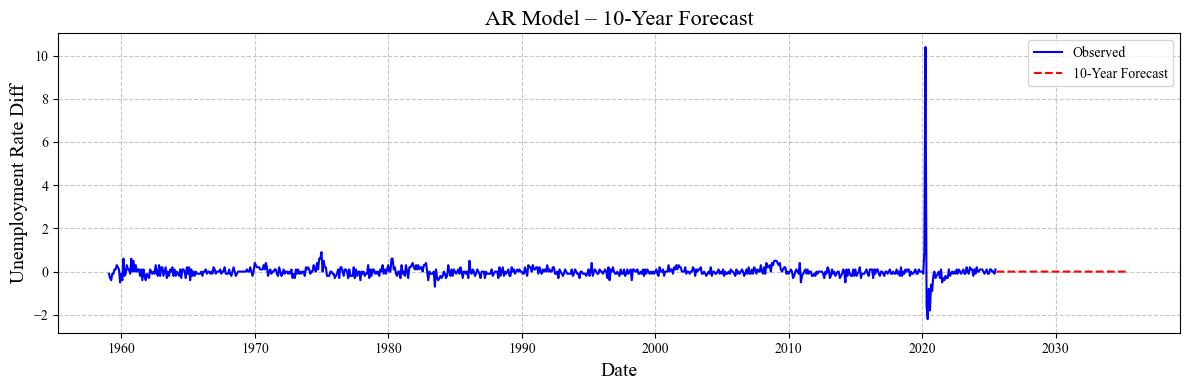

MAE: 0.2292, MSE: 0.7798, RMSE: 0.8831
Ljung-Box Test for AR Residuals
       lb_stat  lb_pvalue
12  19.289776   0.081771


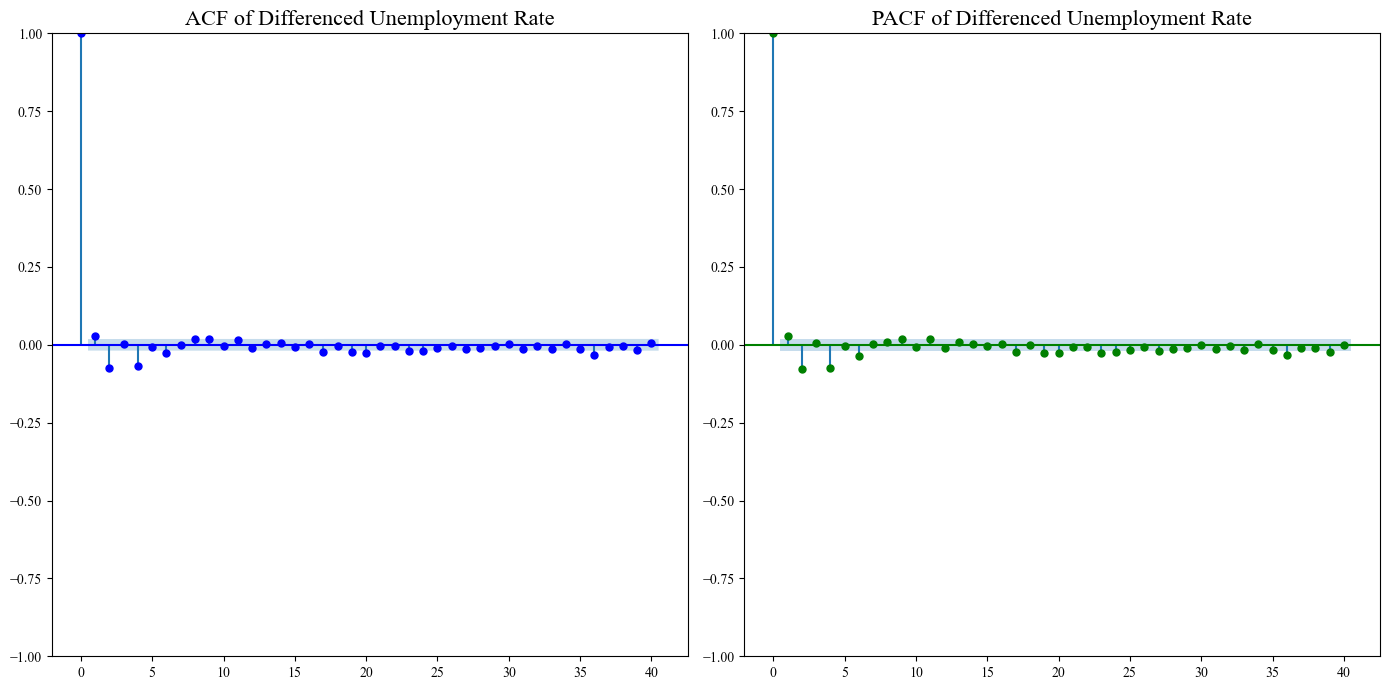

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=911.877, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.243, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=913.130, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=909.605, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=910.607, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=910.515, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=909.785, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=910.620, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=911.584, Time=0.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.114 seconds
Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  798
Model:               SARIMAX(1, 0, 1)   Log Likelihood    

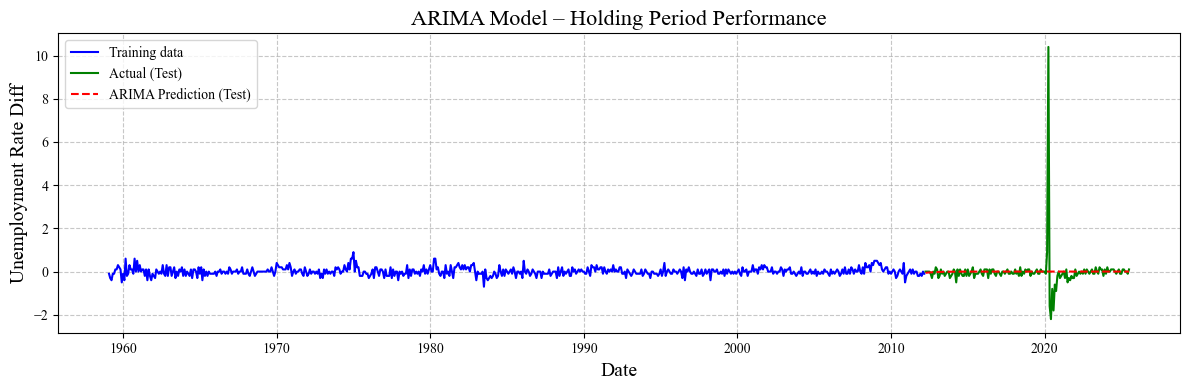

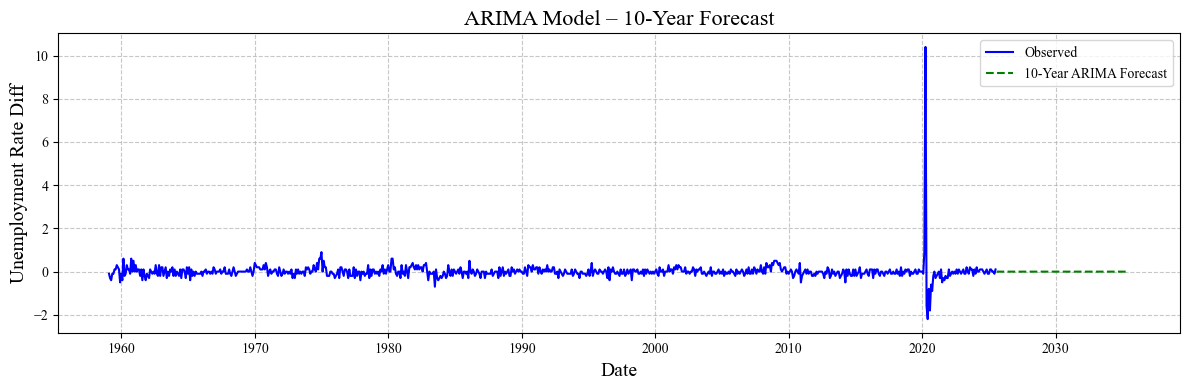

ARIMA MAE: 0.2275, MSE: 0.7794, RMSE: 0.8829
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=913.855, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=917.154, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=917.037, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=911.877, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=915.795, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=915.792, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=917.129, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=915.222, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=915.109, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=911.584, Time=0.14 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=913.560, Time=0.39 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=913.559, Time=0.42 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=915.072, Time=0

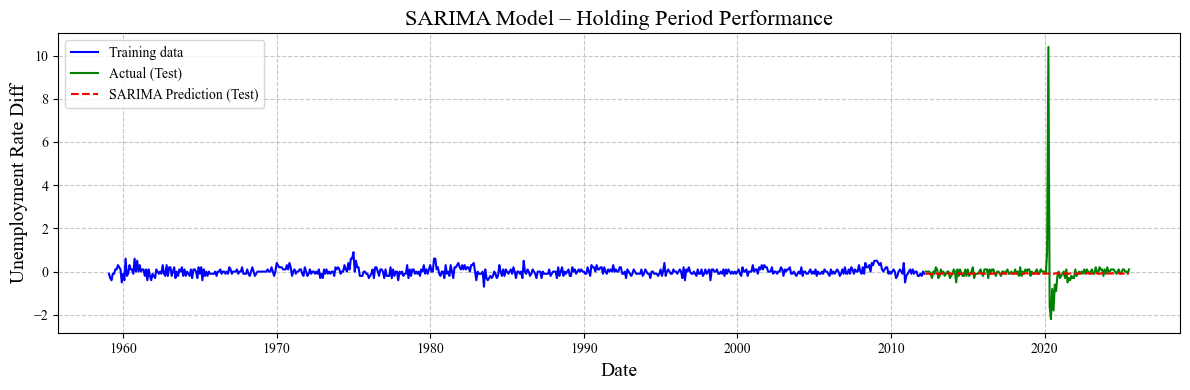

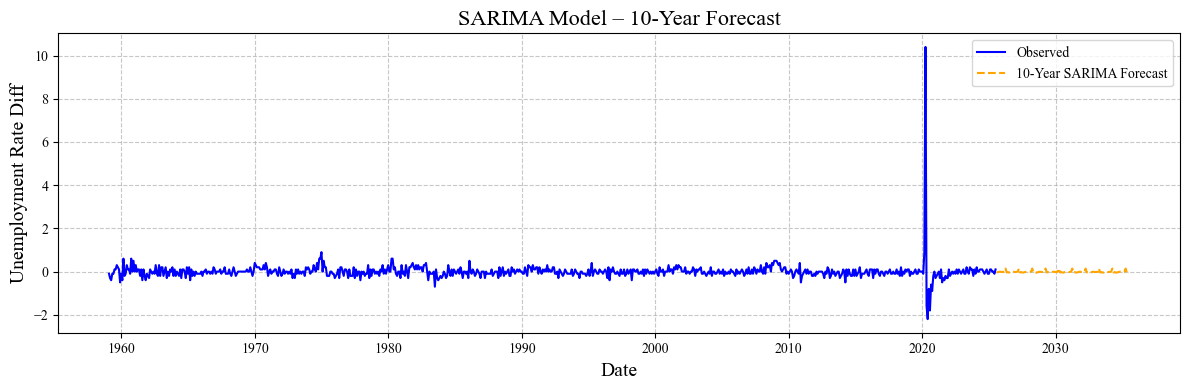

SARIMA MAE: 0.2282, MSE: 0.7837, RMSE: 0.8853


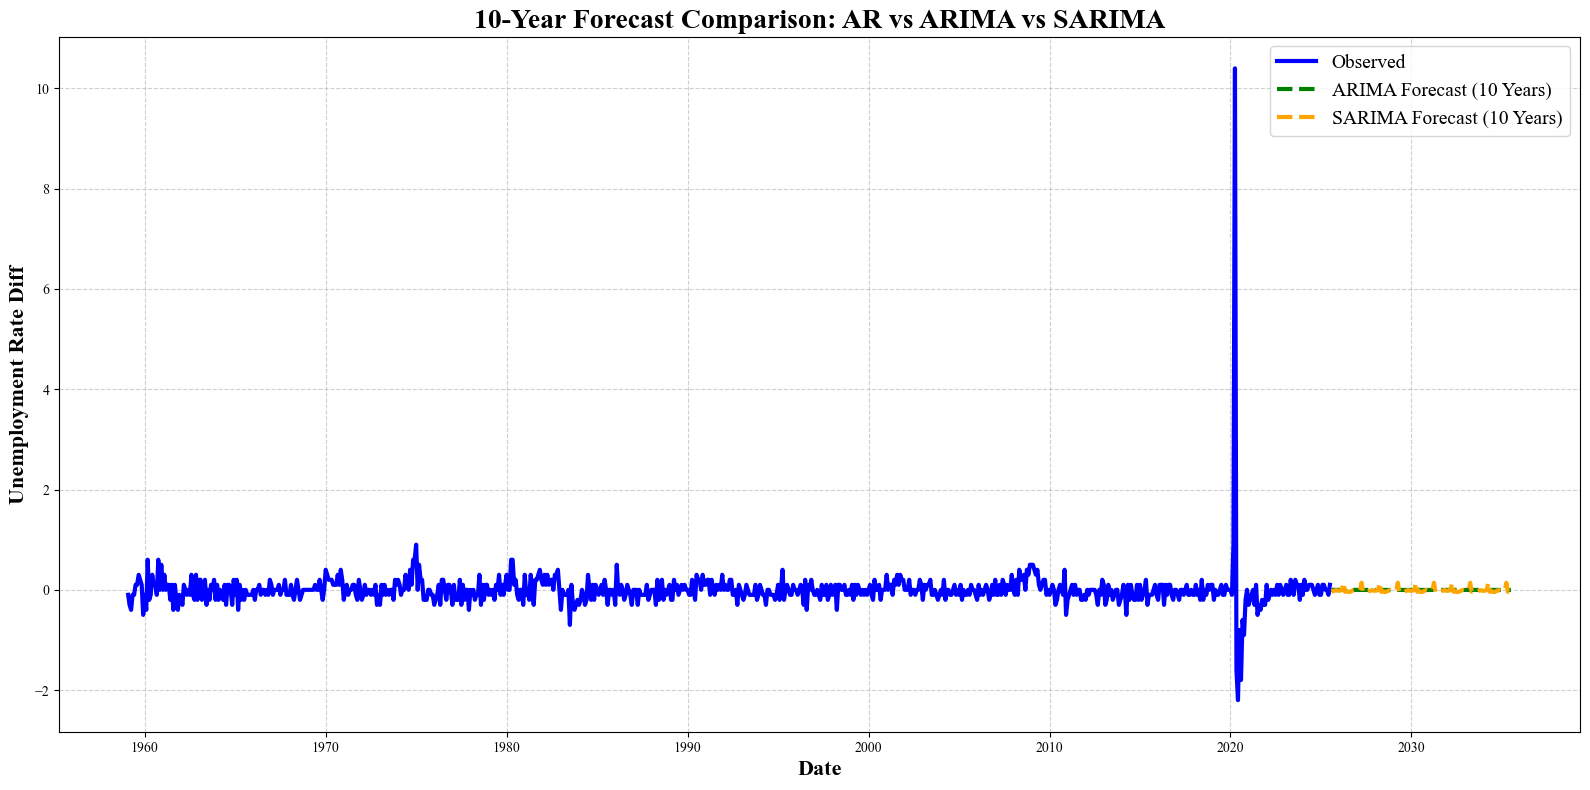

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Assuming 'df_cleaned' is your dataset
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure monthly frequency

# Split the data into training and testing sets (80% training, 20% testing)
train, test = np.split(df_cleaned['Unemployment Rate Diff'], [int(0.8 * len(df_cleaned))])

# Set optimal lag (replace with optimal_aic_lag or optimal_bic_lag)
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if preferred

# 1. Fit AR model with optimal lag
ar_model = AutoReg(train, lags=optimal_lag).fit()
print(f"\nAR-{optimal_lag} Model Summary\n{ar_model.summary()}")

# 2. Predictions and Plot AR Model
test_pred = ar_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')
plt.title("AR Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Forecast for the next 10 years
ar_full = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=optimal_lag).fit()
forecast_120 = ar_full.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=120, freq='MS')
forecast_series = pd.Series(forecast_120, index=forecast_index)

# Plot forecasted data
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_series.index, forecast_series, label="10-Year Forecast", linestyle="--", color='r')
plt.title("AR Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Model Evaluation: MAE, MSE, RMSE
y_true, y_pred = test.values, test_pred.values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse_value = np.sqrt(mse)
print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse_value:.4f}')

# Ljung-Box test for residuals
resid = ar_model.resid
lb = acorr_ljungbox(resid, lags=[12], return_df=True)
print("Ljung-Box Test for AR Residuals\n", lb)

# 5. ARIMA Model - Identify optimal parameters
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('ACF of Differenced Unemployment Rate', fontsize=16)
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('PACF of Differenced Unemployment Rate', fontsize=16)
plt.tight_layout()
plt.show()

# Fit ARIMA using auto_arima to determine optimal parameters
model = auto_arima(df_cleaned['Unemployment Rate Diff'], seasonal=False, stepwise=True, trace=True)
p, d, q = model.order
print(f"Best ARIMA model: {model.summary()}")

# Fit ARIMA model and make predictions
arima_model = ARIMA(train, order=(p, d, q)).fit()
test_pred_arima = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_arima, label="ARIMA Prediction (Test)", linestyle="--", color='r')
plt.title("ARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Refit ARIMA for full dataset and forecast next 10 years
arima_full_model = ARIMA(df_cleaned['Unemployment Rate Diff'], order=(p, d, q)).fit()
forecast_arima_120 = arima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_arima_series = pd.Series(forecast_arima_120, index=forecast_index)

# Plot ARIMA forecast
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_arima_series.index, forecast_arima_series, label="10-Year ARIMA Forecast", linestyle="--", color='g')
plt.title("ARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ARIMA Model Evaluation (MAE, MSE, RMSE)
mae_arima = mean_absolute_error(y_true, test_pred_arima)
mse_arima = mean_squared_error(y_true, test_pred_arima)
rmse_arima = np.sqrt(mse_arima)
print(f'ARIMA MAE: {mae_arima:.4f}, MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}')



# Fit the SARIMA model using auto_arima
sarima_model = auto_arima(df_cleaned['Unemployment Rate Diff'], 
                          seasonal=True, 
                          m=12,  # 12 for monthly data (yearly seasonality)
                          stepwise=True, 
                          trace=True)

# Print the optimal SARIMA model parameters
print(f"Best SARIMA model: {sarima_model.summary()}")


# SARIMA Forecast
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order).fit()
test_pred_sarima = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_sarima, label="SARIMA Prediction (Test)", linestyle="--", color='r')
plt.title("SARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Refit SARIMA for full dataset and forecast next 10 years
sarima_full_model = SARIMAX(df_cleaned['Unemployment Rate Diff'], order=(1, 1, 1), seasonal_order=seasonal_order).fit()
forecast_sarima_120 = sarima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_sarima_series = pd.Series(forecast_sarima_120, index=forecast_index)

# Plot SARIMA forecast
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="10-Year SARIMA Forecast", linestyle="--", color='orange')
plt.title("SARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# SARIMA Model Evaluation (MAE, MSE, RMSE)
mae_sarima = mean_absolute_error(y_true, test_pred_sarima)
mse_sarima = mean_squared_error(y_true, test_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
print(f'SARIMA MAE: {mae_sarima:.4f}, MSE: {mse_sarima:.4f}, RMSE: {rmse_sarima:.4f}')

# Final Comparison Plot: AR vs ARIMA vs SARIMA (10-year forecast)
plt.figure(figsize=(16, 8))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b', linewidth=3)
plt.plot(forecast_index, forecast_arima_series, label="ARIMA Forecast (10 Years)", linestyle="--", color='g', linewidth=3)
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="SARIMA Forecast (10 Years)", linestyle="--", color='orange', linewidth=3)
plt.title("10-Year Forecast Comparison: AR vs ARIMA vs SARIMA", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate Diff', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()



AR-4 Model Summary
                              AutoReg Model Results                               
Dep. Variable:     Unemployment Rate Diff   No. Observations:                  638
Model:                         AutoReg(4)   Log Likelihood                 223.988
Method:                   Conditional MLE   S.D. of innovations              0.170
Date:                    Wed, 31 Dec 2025   AIC                           -435.976
Time:                            09:12:16   BIC                           -409.264
Sample:                        06-01-1959   HQIC                          -425.604
                             - 03-01-2012                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0026      0.007      0.390      0.697      -0.011       0.016
Unemployment Rate Diff.L1     0.01

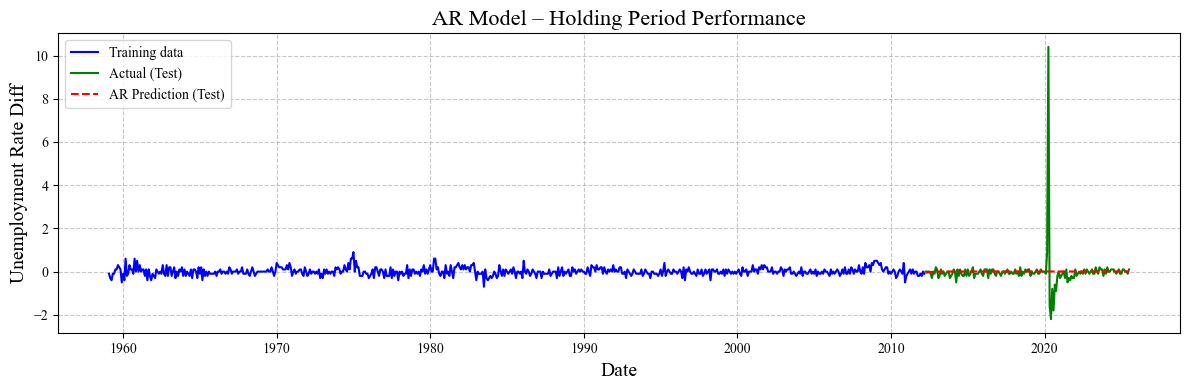

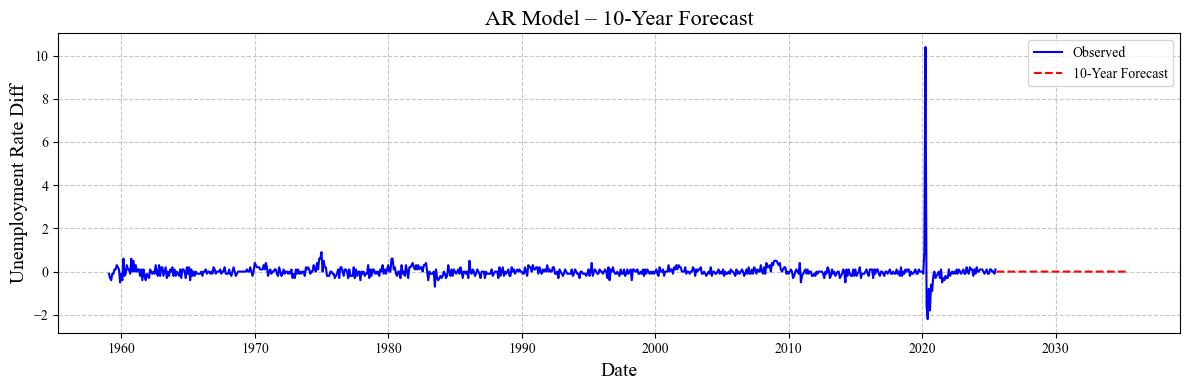

MAE: 0.2292, MSE: 0.7798, RMSE: 0.8831
Ljung-Box Test for AR Residuals
       lb_stat  lb_pvalue
12  19.289776   0.081771


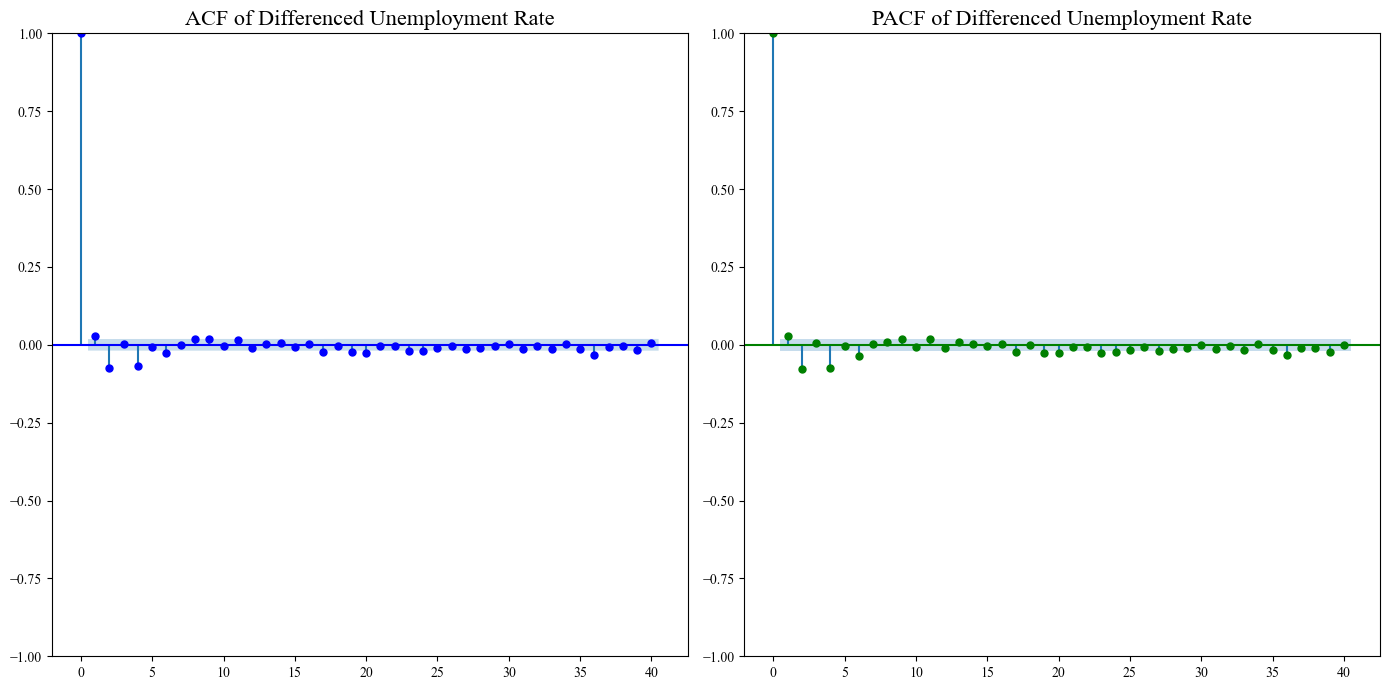

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=911.877, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.243, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=913.130, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=909.605, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=910.607, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=910.515, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=909.785, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=910.620, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=911.584, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.059 seconds
Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  798
Model:               SARIMAX(1, 0, 1)   Log Likelihood    

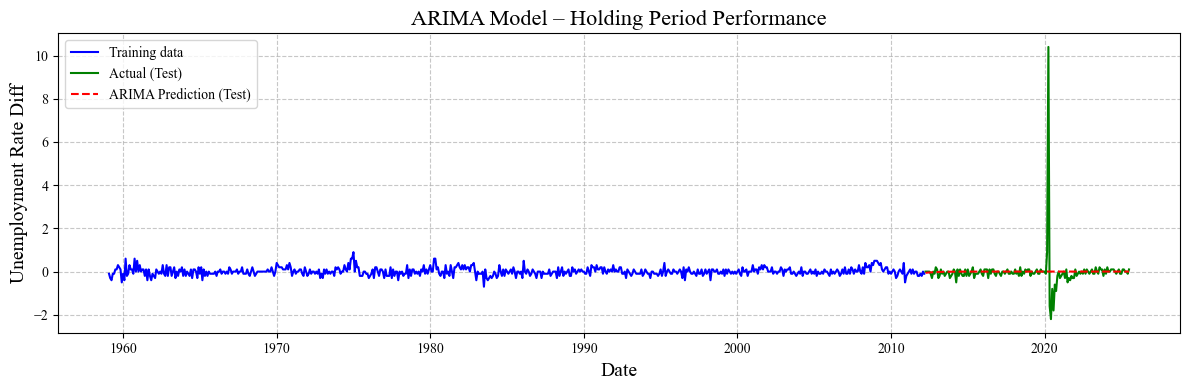

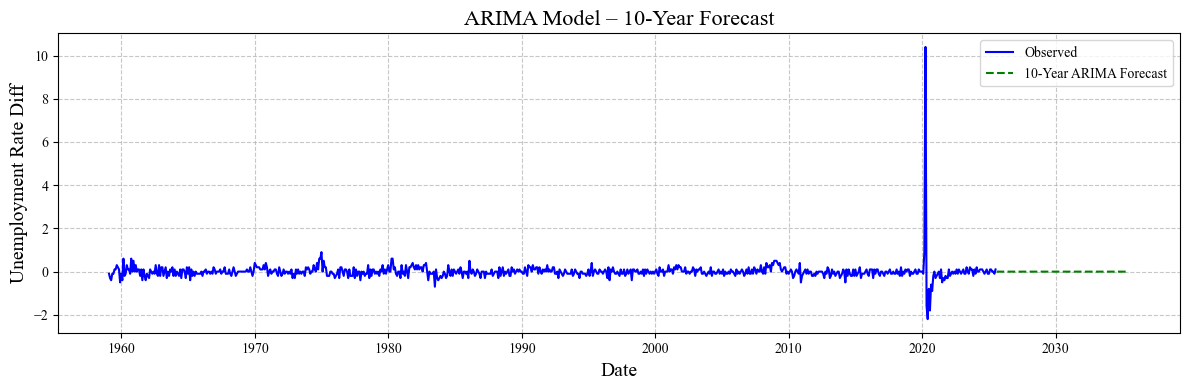

ARIMA MAE: 0.2275, MSE: 0.7794, RMSE: 0.8829
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=913.855, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=917.154, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=917.037, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=911.877, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=915.795, Time=0.08 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=915.792, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=917.129, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=915.222, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=915.109, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=911.584, Time=0.15 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=913.560, Time=0.37 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=913.559, Time=0.37 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=915.072, Time=0

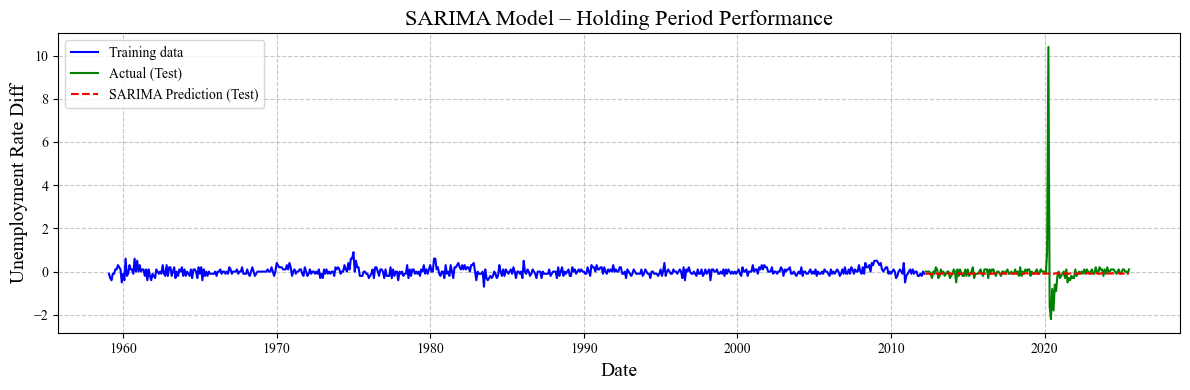

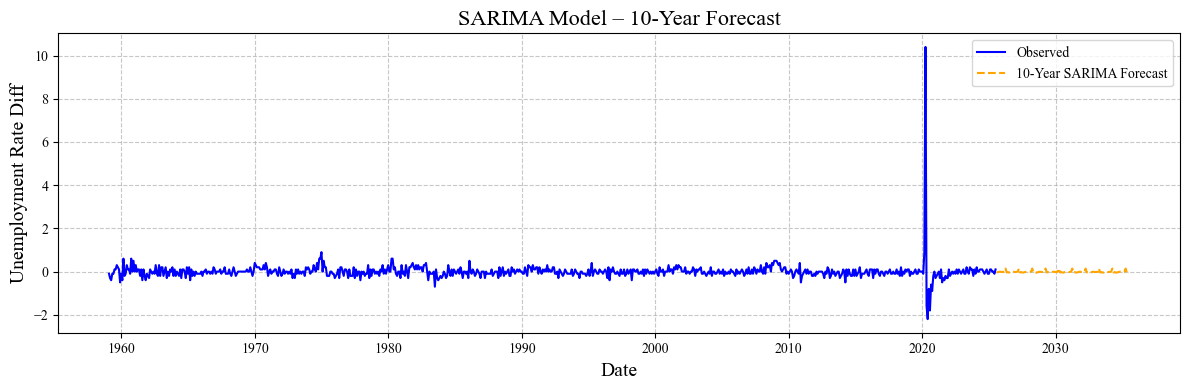

SARIMA MAE: 0.2282, MSE: 0.7837, RMSE: 0.8853


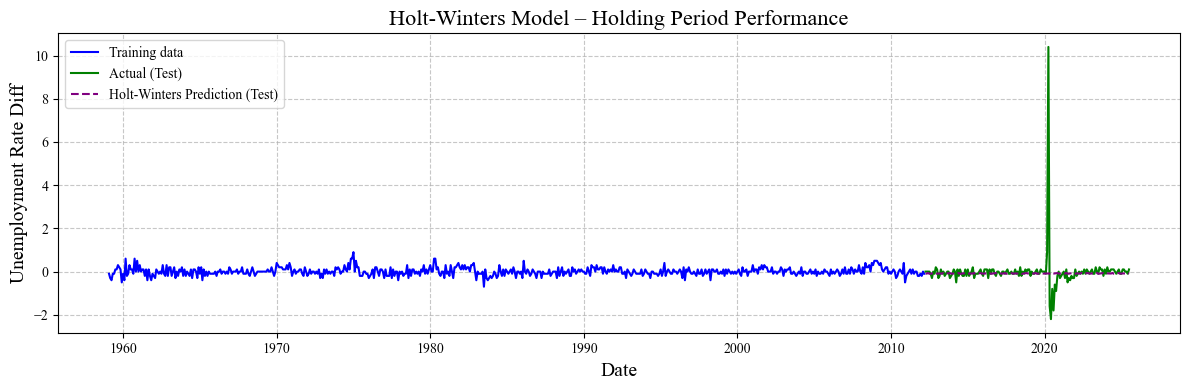

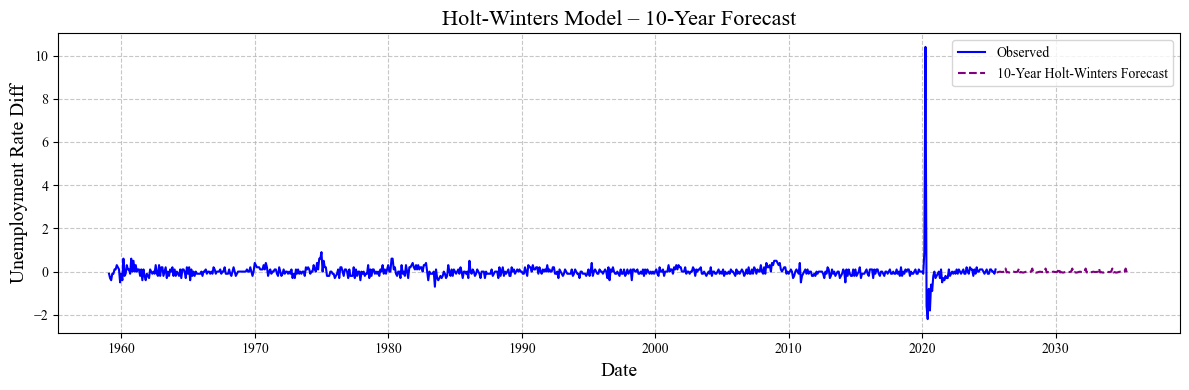

Holt-Winters MAE: 0.2277, MSE: 0.7835, RMSE: 0.8852


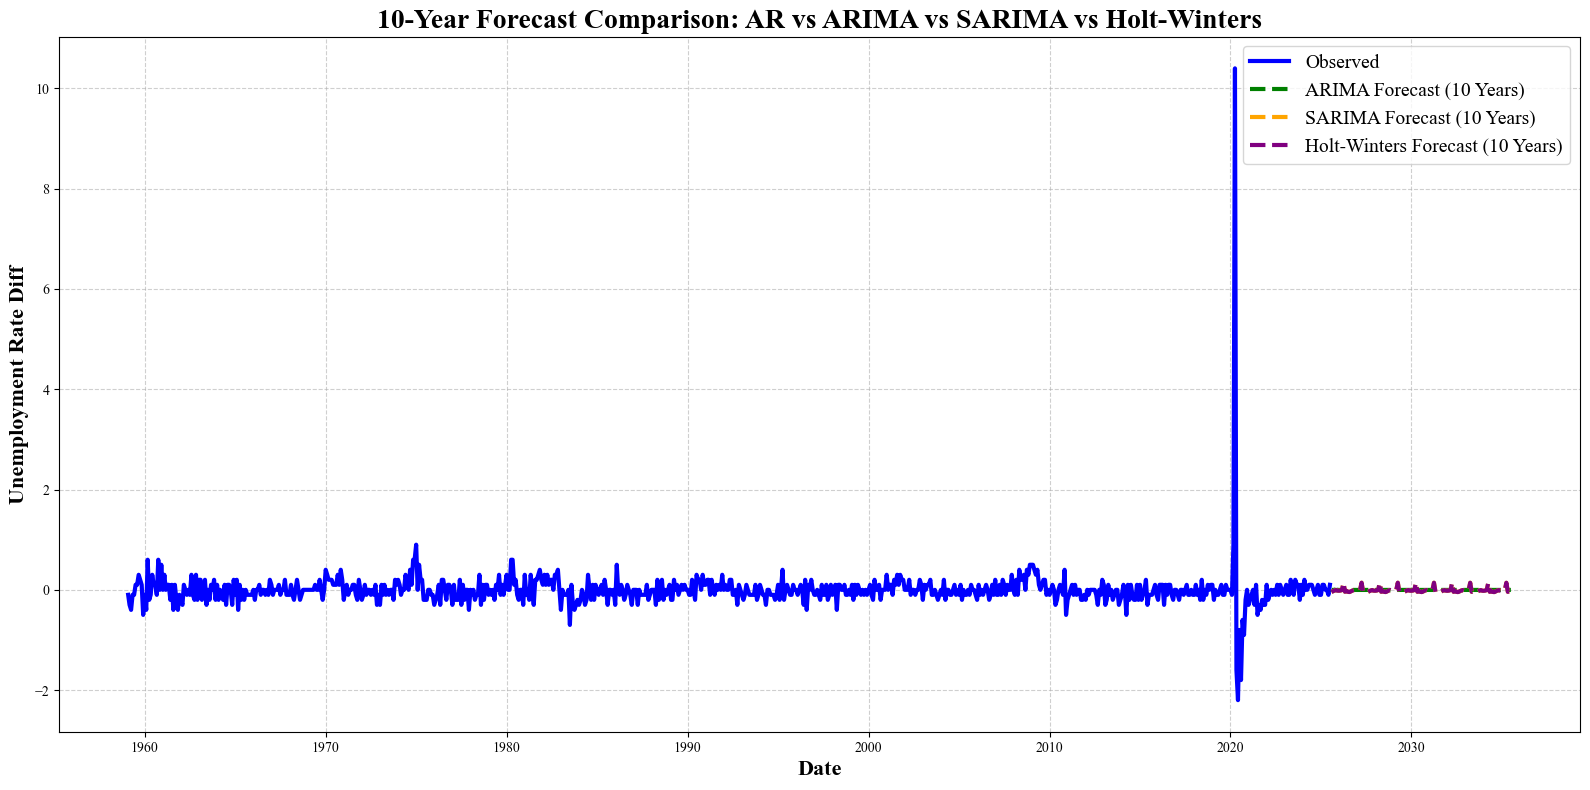

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Assuming 'df_cleaned' is your dataset
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure monthly frequency

# Split the data into training and testing sets (80% training, 20% testing)
train, test = np.split(df_cleaned['Unemployment Rate Diff'], [int(0.8 * len(df_cleaned))])

# Set optimal lag (replace with optimal_aic_lag or optimal_bic_lag)
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if preferred

# 1. Fit AR model with optimal lag
ar_model = AutoReg(train, lags=optimal_lag).fit()
print(f"\nAR-{optimal_lag} Model Summary\n{ar_model.summary()}")

# 2. Predictions and Plot AR Model
test_pred = ar_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--", color='r')
plt.title("AR Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Forecast for the next 10 years
ar_full = AutoReg(df_cleaned['Unemployment Rate Diff'], lags=optimal_lag).fit()
forecast_120 = ar_full.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=120, freq='MS')
forecast_series = pd.Series(forecast_120, index=forecast_index)

# Plot forecasted data
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_series.index, forecast_series, label="10-Year Forecast", linestyle="--", color='r')
plt.title("AR Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Model Evaluation: MAE, MSE, RMSE
y_true, y_pred = test.values, test_pred.values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse_value = np.sqrt(mse)
print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse_value:.4f}')

# Ljung-Box test for residuals
resid = ar_model.resid
lb = acorr_ljungbox(resid, lags=[12], return_df=True)
print("Ljung-Box Test for AR Residuals\n", lb)

# 5. ARIMA Model - Identify optimal parameters
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('ACF of Differenced Unemployment Rate', fontsize=16)
plt.subplot(122)
plot_pacf(df_cleaned['Unemployment Rate Diff'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('PACF of Differenced Unemployment Rate', fontsize=16)
plt.tight_layout()
plt.show()

# Fit ARIMA using auto_arima to determine optimal parameters
model = auto_arima(df_cleaned['Unemployment Rate Diff'], seasonal=False, stepwise=True, trace=True)
p, d, q = model.order
print(f"Best ARIMA model: {model.summary()}")

# Fit ARIMA model and make predictions
arima_model = ARIMA(train, order=(p, d, q)).fit()
test_pred_arima = arima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_arima, label="ARIMA Prediction (Test)", linestyle="--", color='r')
plt.title("ARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Refit ARIMA for full dataset and forecast next 10 years
arima_full_model = ARIMA(df_cleaned['Unemployment Rate Diff'], order=(p, d, q)).fit()
forecast_arima_120 = arima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_arima_series = pd.Series(forecast_arima_120, index=forecast_index)

# Plot ARIMA forecast
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_arima_series.index, forecast_arima_series, label="10-Year ARIMA Forecast", linestyle="--", color='g')
plt.title("ARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# ARIMA Model Evaluation (MAE, MSE, RMSE)
mae_arima = mean_absolute_error(y_true, test_pred_arima)
mse_arima = mean_squared_error(y_true, test_pred_arima)
rmse_arima = np.sqrt(mse_arima)
print(f'ARIMA MAE: {mae_arima:.4f}, MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}')


# Fit the SARIMA model using auto_arima
sarima_model = auto_arima(df_cleaned['Unemployment Rate Diff'], 
                          seasonal=True, 
                          m=12,  # 12 for monthly data (yearly seasonality)
                          stepwise=True, 
                          trace=True)

# Print the optimal SARIMA model parameters
print(f"Best SARIMA model: {sarima_model.summary()}")


# SARIMA Forecast
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order).fit()
test_pred_sarima = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_sarima, label="SARIMA Prediction (Test)", linestyle="--", color='r')
plt.title("SARIMA Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Refit SARIMA for full dataset and forecast next 10 years
sarima_full_model = SARIMAX(df_cleaned['Unemployment Rate Diff'], order=(1, 1, 1), seasonal_order=seasonal_order).fit()
forecast_sarima_120 = sarima_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + 119, dynamic=False)
forecast_sarima_series = pd.Series(forecast_sarima_120, index=forecast_index)

# Plot SARIMA forecast
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="10-Year SARIMA Forecast", linestyle="--", color='orange')
plt.title("SARIMA Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# SARIMA Model Evaluation (MAE, MSE, RMSE)
mae_sarima = mean_absolute_error(y_true, test_pred_sarima)
mse_sarima = mean_squared_error(y_true, test_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
print(f'SARIMA MAE: {mae_sarima:.4f}, MSE: {mse_sarima:.4f}, RMSE: {rmse_sarima:.4f}')


# Holt-Winters Forecasting
# Fit Holt-Winters model (Additive or Multiplicative based on your data characteristics)
holt_winters_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

# Make predictions for the test data
test_pred_hw = holt_winters_model.predict(start=test.index[0], end=test.index[-1])
plt.figure(figsize=(12, 4))
plt.plot(train.index, train, label="Training data", color='b')
plt.plot(test.index, test, label="Actual (Test)", color='g')
plt.plot(test.index, test_pred_hw, label="Holt-Winters Prediction (Test)", linestyle="--", color='purple')
plt.title("Holt-Winters Model – Holding Period Performance", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Holt-Winters Forecast for the next 10 years
holt_winters_full_model = ExponentialSmoothing(df_cleaned['Unemployment Rate Diff'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_hw_120 = holt_winters_full_model.predict(start=len(df_cleaned), end=len(df_cleaned) + 119)
forecast_hw_series = pd.Series(forecast_hw_120, index=forecast_index)

# Plot Holt-Winters forecast
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b')
plt.plot(forecast_hw_series.index, forecast_hw_series, label="10-Year Holt-Winters Forecast", linestyle="--", color='purple')
plt.title("Holt-Winters Model – 10-Year Forecast", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unemployment Rate Diff', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Holt-Winters Model Evaluation (MAE, MSE, RMSE)
mae_hw = mean_absolute_error(y_true, test_pred_hw)
mse_hw = mean_squared_error(y_true, test_pred_hw)
rmse_hw = np.sqrt(mse_hw)
print(f'Holt-Winters MAE: {mae_hw:.4f}, MSE: {mse_hw:.4f}, RMSE: {rmse_hw:.4f}')

# Final Comparison Plot: AR vs ARIMA vs SARIMA vs Holt-Winters (10-year forecast)
plt.figure(figsize=(16, 8))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label="Observed", color='b', linewidth=3)
plt.plot(forecast_index, forecast_arima_series, label="ARIMA Forecast (10 Years)", linestyle="--", color='g', linewidth=3)
plt.plot(forecast_sarima_series.index, forecast_sarima_series, label="SARIMA Forecast (10 Years)", linestyle="--", color='orange', linewidth=3)
plt.plot(forecast_hw_series.index, forecast_hw_series, label="Holt-Winters Forecast (10 Years)", linestyle="--", color='purple', linewidth=3)
plt.title("10-Year Forecast Comparison: AR vs ARIMA vs SARIMA vs Holt-Winters", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate Diff', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
